<a href="https://colab.research.google.com/github/wlgp8563/HarryPoter_Sentiment/blob/main/HarryPotter_Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install funpymodeling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 215 kB 6.2 MB/s 
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=5860afdf71ef28c8270b773c9992dcb99d2a1638a67bbd1bde54e06ee630cbd0
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built sklearn
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2


In [ ]:
import pandas as pd
from funpymodeling.exploratory import freq_tbl, status, profiling_num, cat_vars, num_vars
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
from google.colab import drive     #구글 내 드라이브에 필요한 데이터셋 저장 후 불러오기 위해 사용용
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cha_df = pd.read_csv('/content/drive/MyDrive/Movie_Characters.csv', encoding='cp949')   #데이터셋 불러오기기

In [ ]:
cha_df.head(10)   #데이터셋 상위 10개 보이기기

,Character ID,Character Name,Species,Gender,House,Patronus,Wand (Wood),Wand (Core)
0,1,Harry Potter,Human,Male,Gryffindor,Stag,Holly,Phoenix Feather
1,2,Ron Weasley,Human,Male,Gryffindor,Jack Russell Terrier,NaN,NaN
2,3,Hermione Granger,Human,Female,Gryffindor,Otter,Vine,Dragon Heartstring
3,4,Albus Dumbledore,Human,Male,Gryffindor,Phoenix,Elder,Thestral Tail Hair
4,5,Rubeus Hagrid,Half-Human/Half-Giant,Male,Gryffindor,NaN,Oak,NaN
5,6,Severus Snape,Human,Male,Slytherin,Doe,NaN,NaN
6,7,Minerva McGonagall,Human,Female,Gryffindor,Cat,Fir,Dragon Heartstring
7,8,Horace Slughorn,Human,Male,Slytherin,NaN,Cedar,Dragon Heartstring
8,9,Voldemort,Human,Male,Slytherin,NaN,Yew,Phoenix Feather
9,10,Neville Longbottom,Human,Male,Gryffindor,NaN,Cherry,Unicorn Hair


In [ ]:
dia_df = pd.read_csv('/content/drive/MyDrive/Dialogue.csv', encoding='cp949')    #대사 데이터셋 읽기기

In [ ]:
dia_df.head(10)   #읽은 데이터셋 상위 10개 보이기기

,Dialogue ID,Chapter ID,Place ID,Character ID,Dialogue,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,1,1,8,4,I should have known that you would be here...P...,NaN,NaN,NaN,NaN
1,2,1,8,7,"Good evening, Professor Dumbledore. Are the ru...",NaN,NaN,NaN,NaN
2,3,1,8,4,"I'm afraid so, Professor. The good, and the bad.",NaN,NaN,NaN,NaN
3,4,1,8,7,And the boy?,NaN,NaN,NaN,NaN
4,5,1,8,4,Hagrid is bringing him.,NaN,NaN,NaN,NaN
5,6,1,8,7,Do you think it wise to trust Hagrid with some...,NaN,NaN,NaN,NaN
6,7,1,8,4,"Ah, Professor, I would trust Hagrid with my life.",NaN,NaN,NaN,NaN
7,8,1,8,5,"Professor Dumbledore, Sir. Professor McGonagall.",NaN,NaN,NaN,NaN
8,9,1,8,4,"No problems, I trust, Hagrid?",NaN,NaN,NaN,NaN
9,10,1,8,5,"No, sir. Little tyke fell asleep just as we we...",NaN,NaN,NaN,NaN


In [ ]:
cha_df

,Character ID,Character Name,Species,Gender,House,Patronus,Wand (Wood),Wand (Core)
0,1,Harry Potter,Human,Male,Gryffindor,Stag,Holly,Phoenix Feather
1,2,Ron Weasley,Human,Male,Gryffindor,Jack Russell Terrier,NaN,NaN
2,3,Hermione Granger,Human,Female,Gryffindor,Otter,Vine,Dragon Heartstring
3,4,Albus Dumbledore,Human,Male,Gryffindor,Phoenix,Elder,Thestral Tail Hair
4,5,Rubeus Hagrid,Half-Human/Half-Giant,Male,Gryffindor,NaN,Oak,NaN
...,...,...,...,...,...,...,...,...
161,162,Waiter,NaN,NaN,NaN,NaN,NaN,NaN
162,163,Boy 2,NaN,NaN,NaN,NaN,NaN,NaN
163,164,Crowd,NaN,NaN,NaN,NaN,NaN,NaN
164,165,Gryffindors,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dia_df

,Dialogue ID,Chapter ID,Place ID,Character ID,Dialogue,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,1,1,8,4,I should have known that you would be here...P...,NaN,NaN,NaN,NaN
1,2,1,8,7,"Good evening, Professor Dumbledore. Are the ru...",NaN,NaN,NaN,NaN
2,3,1,8,4,"I'm afraid so, Professor. The good, and the bad.",NaN,NaN,NaN,NaN
3,4,1,8,7,And the boy?,NaN,NaN,NaN,NaN
4,5,1,8,4,Hagrid is bringing him.,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
7429,7440,234,71,1,Then Slytherin House will have gained a wonder...,NaN,NaN,NaN,NaN
7430,7441,234,71,84,Really?,NaN,NaN,NaN,NaN
7431,7442,234,71,1,Really.,NaN,NaN,NaN,NaN
7432,7443,234,71,1,Ready?,NaN,NaN,NaN,NaN


In [ ]:
dia_df.columns

Index(['Dialogue ID', 'Chapter ID', 'Place ID', 'Character ID', 'Dialogue',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'],
      dtype='object')

In [ ]:
clean_dia = dia_df.loc[:, "Dialogue ID":"Dialogue"]  #불필요한 열 삭제
clean_dia

,Dialogue ID,Chapter ID,Place ID,Character ID,Dialogue
0,1,1,8,4,I should have known that you would be here...P...
1,2,1,8,7,"Good evening, Professor Dumbledore. Are the ru..."
2,3,1,8,4,"I'm afraid so, Professor. The good, and the bad."
3,4,1,8,7,And the boy?
4,5,1,8,4,Hagrid is bringing him.
...,...,...,...,...,...
7429,7440,234,71,1,Then Slytherin House will have gained a wonder...
7430,7441,234,71,84,Really?
7431,7442,234,71,1,Really.
7432,7443,234,71,1,Ready?


In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
from pandas import Series, DataFrame

In [ ]:
sort_cha = cha_df.sort_values(by=['Character ID', 'House'])   #Charcater ID를 오름차순으로 정렬한 것을 House별로 정렬
sort_cha
newsort_cha = sort_cha.loc[:, "Character ID":"House"]         #Character ID부터 House까지의 데이터로 축소
newsort_cha

,Character ID,Character Name,Species,Gender,House
0,1,Harry Potter,Human,Male,Gryffindor
1,2,Ron Weasley,Human,Male,Gryffindor
2,3,Hermione Granger,Human,Female,Gryffindor
3,4,Albus Dumbledore,Human,Male,Gryffindor
4,5,Rubeus Hagrid,Half-Human/Half-Giant,Male,Gryffindor
...,...,...,...,...,...
161,162,Waiter,NaN,NaN,NaN
162,163,Boy 2,NaN,NaN,NaN
163,164,Crowd,NaN,NaN,NaN
164,165,Gryffindors,NaN,NaN,NaN


In [ ]:
sort_dia = clean_dia.sort_values(by='Character ID')    #Character ID 오름차순으로 정렬
sort_dia

,Dialogue ID,Chapter ID,Place ID,Character ID,Dialogue
1472,1482,54,46,1,Come on.
1741,1752,64,25,1,You wait here and try and shift some of this r...
1743,1754,64,25,1,Hesha- Hassah.
1744,1755,65,25,1,"Ginny Ginny! Oh, Ginny, please don't be dead. ..."
1746,1757,65,25,1,"Tom. Tom Riddle! What do you mean, 'she won't ..."
...,...,...,...,...,...
1082,1087,41,71,162,Oy! What do you two think you're doing?
356,357,15,52,163,"Oh, that was wicked, Harry."
527,528,20,51,164,Go go Gryffindor! Go go Gryffindor! Go go Gryf...
507,508,19,51,165,Yay!


In [ ]:
chadia = pd.merge(newsort_cha, sort_dia)        #newsort_dia와 sort_dia 표 내용 합치기기
chadia

,Character ID,Character Name,Species,Gender,House,Dialogue ID,Chapter ID,Place ID,Dialogue
0,1,Harry Potter,Human,Male,Gryffindor,1482,54,46,Come on.
1,1,Harry Potter,Human,Male,Gryffindor,1752,64,25,You wait here and try and shift some of this r...
2,1,Harry Potter,Human,Male,Gryffindor,1754,64,25,Hesha- Hassah.
3,1,Harry Potter,Human,Male,Gryffindor,1755,65,25,"Ginny Ginny! Oh, Ginny, please don't be dead. ..."
4,1,Harry Potter,Human,Male,Gryffindor,1757,65,25,"Tom. Tom Riddle! What do you mean, 'she won't ..."
...,...,...,...,...,...,...,...,...,...
7429,162,Waiter,NaN,NaN,NaN,1087,41,71,Oy! What do you two think you're doing?
7430,163,Boy 2,NaN,NaN,NaN,357,15,52,"Oh, that was wicked, Harry."
7431,164,Crowd,NaN,NaN,NaN,528,20,51,Go go Gryffindor! Go go Gryffindor! Go go Gryf...
7432,165,Gryffindors,NaN,NaN,NaN,508,19,51,Yay!


In [ ]:
house_Gry = chadia[chadia['House'] == 'Gryffindor']         #위의 데이터셋에서 기숙사가 그리핀도르에 해당되는 열만 가져와 저장
house_Gry

,Character ID,Character Name,Species,Gender,House,Dialogue ID,Chapter ID,Place ID,Dialogue
0,1,Harry Potter,Human,Male,Gryffindor,1482,54,46,Come on.
1,1,Harry Potter,Human,Male,Gryffindor,1752,64,25,You wait here and try and shift some of this r...
2,1,Harry Potter,Human,Male,Gryffindor,1754,64,25,Hesha- Hassah.
3,1,Harry Potter,Human,Male,Gryffindor,1755,65,25,"Ginny Ginny! Oh, Ginny, please don't be dead. ..."
4,1,Harry Potter,Human,Male,Gryffindor,1757,65,25,"Tom. Tom Riddle! What do you mean, 'she won't ..."
...,...,...,...,...,...,...,...,...,...
7207,94,Katie Bell,Human,Female,Gryffindor,5419,176,36,"Give me a moment, girls."
7240,106,Colin Creevey,Human,Male,Gryffindor,1160,44,36,"Hi, Harry! I'm Colin Creevy! I'm in Gryffindo..."
7241,106,Colin Creevey,Human,Male,Gryffindor,1204,46,45,"Wow! Can you turn him around, Harry?"
7250,111,Nigel Wolpert,Human,Male,Gryffindor,3123,116,36,Parcel for you Mr Weasley.


In [ ]:
house_Sly = chadia[chadia['House'] == 'Slytherin']           #위의 데이터셋에서 기숙사가 슬리데린에 해당되는 열만 가져와 저장
house_Sly

,Character ID,Character Name,Species,Gender,House,Dialogue ID,Chapter ID,Place ID,Dialogue
4330,6,Severus Snape,Human,Male,Slytherin,5210,171,49,You've just bought yourself a month's detentio...
4331,6,Severus Snape,Human,Male,Slytherin,7211,225,24,Please.
4332,6,Severus Snape,Human,Male,Slytherin,2512,94,20,Expelliarmus! Vengeance is sweet. How I hoped ...
4333,6,Severus Snape,Human,Male,Slytherin,7210,225,24,Take them!
4334,6,Severus Snape,Human,Male,Slytherin,2514,94,20,I told Dumbledore you were helping an old frie...
...,...,...,...,...,...,...,...,...,...
7239,105,Blaise Zabini,Human,Male,Slytherin,4921,164,49,"Have you ever taken it, sir?"
7258,115,Walburga Black,Human,Female,Slytherin,3591,133,7,"Blood traitor, abomination, shame of my flesh!"
7259,115,Walburga Black,Human,Female,Slytherin,3589,133,7,"Filth! Scum! Half-breeds, mutants, freaks, beg..."
7262,117,Bloody Baron,Ghost,Male,Slytherin,276,13,36,Whoo-hoo-hoo!


In [ ]:
house_Huf = chadia[chadia['House'] == 'Hufflepuff']           #위의 데이터셋에서 기숙사가 후푸프풀에 해당되는 열만 가져와 저장
house_Huf

,Character ID,Character Name,Species,Gender,House,Dialogue ID,Chapter ID,Place ID,Dialogue
6580,36,Cedric Diggory,Human,Male,Hufflepuff,3403,126,14,What is it?
6581,36,Cedric Diggory,Human,Male,Hufflepuff,3050,115,45,"Are you serious? And Fleur and Krum, do they...?"
6582,36,Cedric Diggory,Human,Male,Hufflepuff,3246,120,29,Hey Potter.
6583,36,Cedric Diggory,Human,Male,Hufflepuff,2773,105,17,Yes sir.
6584,36,Cedric Diggory,Human,Male,Hufflepuff,3402,126,14,What are you talking about?
6585,36,Cedric Diggory,Human,Male,Hufflepuff,3400,126,14,It's a portkey. Harry the cup is a portkey.
6586,36,Cedric Diggory,Human,Male,Hufflepuff,3398,126,14,Where are we?
6587,36,Cedric Diggory,Human,Male,Hufflepuff,3390,125,62,You know for a moment there I thought you were...
6588,36,Cedric Diggory,Human,Male,Hufflepuff,3048,115,45,Alright.
6589,36,Cedric Diggory,Human,Male,Hufflepuff,3405,126,14,Who are you? What do you want?


In [ ]:
house_Rav = chadia[chadia['House'] == 'Ravenclaw']               #위의 데이터셋에서 기숙사가 레번클로에 해당되는 열만 가져와 저장
house_Rav

,Character ID,Character Name,Species,Gender,House,Dialogue ID,Chapter ID,Place ID,Dialogue
6143,25,Luna Lovegood,Human,Female,Ravenclaw,6708,207,13,"Whenever you're ready, sir."
6144,25,Luna Lovegood,Human,Female,Ravenclaw,6696,206,13,"You're bleeding, Harry. That's a curious thing..."
6145,25,Luna Lovegood,Human,Female,Ravenclaw,6687,206,13,Ron? Harry?
6146,25,Luna Lovegood,Human,Female,Ravenclaw,4821,161,42,Quibbler...? Quibbler...?
6147,25,Luna Lovegood,Human,Female,Ravenclaw,4822,161,42,There's an article on Wrackspurts this month. ...
...,...,...,...,...,...,...,...,...,...
7228,101,Padma Patil,Human,Female,Ravenclaw,3189,118,39,Hi Harry.
7229,101,Padma Patil,Human,Female,Ravenclaw,3224,119,36,Are you going to ask me to dance or not?
7230,101,Padma Patil,Human,Female,Ravenclaw,3213,119,36,Is that Hermione Granger? With Viktor Krum??
7264,119,Michael Corner,Human,Male,Ravenclaw,3915,143,21,I for one would like to know why Potter's qual...


In [ ]:
house_Gry['Dialogue'].count()          #그리핀도르에 해당되는 캐릭터가 내뱉은 대사 개수

5362

In [ ]:
house_Sly['Dialogue'].count()          #슬리데린에 해당되는 캐릭터가 내뱉은 대사 개수

860

In [ ]:
house_Huf['Dialogue'].count()          #후풀프푸에 해당되는 캐릭터가 내뱉은 대사 개수

56

In [ ]:
house_Rav['Dialogue'].count()          #레번클로에 해당되는 캐릭터가 내뱉은 대사 개수

222

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import nltk
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from collections import Counter
import re

In [ ]:
nltk.download('stopwords')                                                                               
nltk.download('punkt')

#그리핀도르에 해당하는 대사에 nltk에서 제공하는 stopword를 제외하고 단어 리스트를 모아 횟수 확인
gry_dialogues = ' '.join(
    chadia.loc[chadia['House'] == 'Gryffindor']['Dialogue'])

first_names = []
for character in chadia['Character Name'].to_list()[:len(chadia['Character Name'].to_list())//2]:
    if len (character.split(' ')) > 1:
        first_names.append(character.split(' ')[0])
        
stopwords = nltk.corpus.stopwords.words('english')

gry_dialogues_list = []
for token in word_tokenize(gry_dialogues):
    if ((len(token) != 1) and ('...' not in token) and ("'" not in token)) and \
                              (":" not in token) and ("--" not in token) and \
                              ("Dumbledore" not in token) and \
                              (token.lower() not in stopwords) and (token not in first_names):
        gry_dialogues_list.append(token)
        
words_frequencies1 = dict(Counter(gry_dialogues_list))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


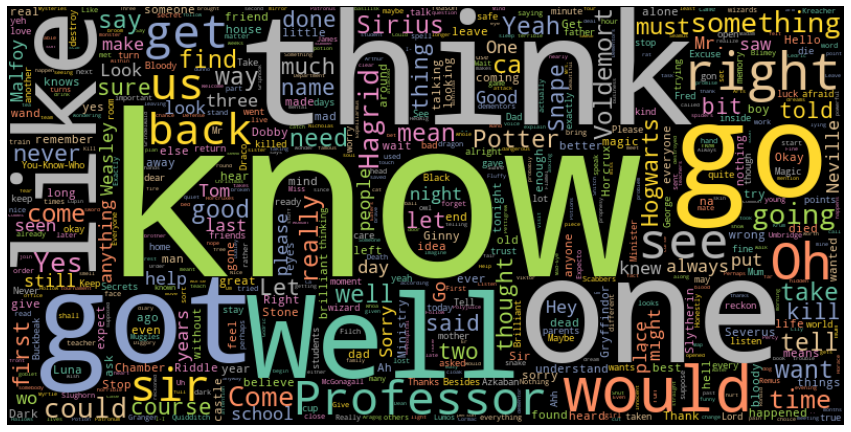

In [ ]:
#확인한 횟수 워드클라우드 모형으로 나타내기
words_cloud = WordCloud(background_color='black', width=800, height=400, colormap='Set2',
                        max_words=2000).generate_from_frequencies(words_frequencies1)
        
plt.figure(figsize=[15,15])
plt.imshow(words_cloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [ ]:
#슬리데린에 해당하는 대사에 nltk에서 제공하는 stopword를 제외하고 단어 리스트를 모아 횟수 확인
sly_dialogues = ' '.join(
    chadia.loc[chadia['House'] == 'Slytherin']['Dialogue'])

first_names = []
for character in chadia['Character Name'].to_list()[:len(chadia['Character Name'].to_list())//2]:
    if len (character.split(' ')) > 1:
        first_names.append(character.split(' ')[0])
        
stopwords = nltk.corpus.stopwords.words('english')

sly_dialogues_list = []
for token in word_tokenize(sly_dialogues):
    if ((len(token) != 1) and ('...' not in token) and ("'" not in token)) and \
                              (":" not in token) and ("--" not in token) and \
                              ("Dumbledore" not in token) and \
                              (token.lower() not in stopwords) and (token not in first_names):
        sly_dialogues_list.append(token)
        
words_frequencies2 = dict(Counter(sly_dialogues_list))

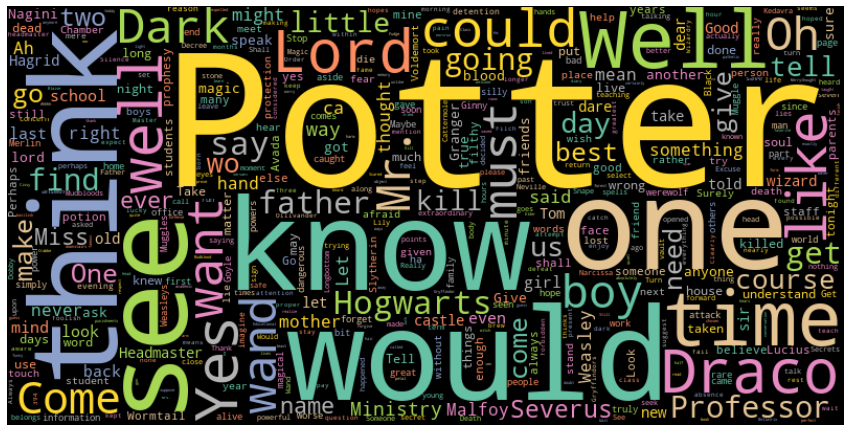

In [ ]:
#확인한 횟수 워드클라우드 모형으로 나타내기
words_cloud = WordCloud(background_color='black', width=800, height=400, colormap='Set2',
                        max_words=2000).generate_from_frequencies(words_frequencies2)
        
plt.figure(figsize=[15,15])
plt.imshow(words_cloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [ ]:
#후플푸프에 해당하는 대사에 nltk에서 제공하는 stopword를 제외하고 단어 리스트를 모아 횟수 확인
huf_dialogues = ' '.join(
    chadia.loc[chadia['House'] == 'Hufflepuff']['Dialogue'])

first_names = []
for character in chadia['Character Name'].to_list()[:len(chadia['Character Name'].to_list())//2]:
    if len (character.split(' ')) > 1:
        first_names.append(character.split(' ')[0])
        
stopwords = nltk.corpus.stopwords.words('english')

huf_dialogues_list = []
for token in word_tokenize(huf_dialogues):
    if ((len(token) != 1) and ('...' not in token) and ("'" not in token)) and \
                              (":" not in token) and ("--" not in token) and \
                              ("Dumbledore" not in token) and \
                              (token.lower() not in stopwords) and (token not in first_names):
        huf_dialogues_list.append(token)
        
words_frequencies3 = dict(Counter(huf_dialogues_list))

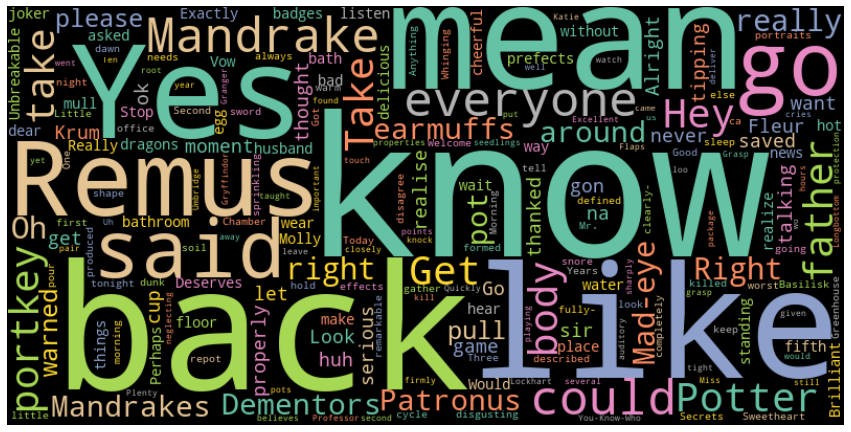

In [ ]:
#확인한 횟수 워드클라우드 모형으로 나타내기
words_cloud = WordCloud(background_color='black', width=800, height=400, colormap='Set2',
                        max_words=2000).generate_from_frequencies(words_frequencies3)
        
plt.figure(figsize=[15,15])
plt.imshow(words_cloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [ ]:
#레번클로에 해당하는 대사에 nltk에서 제공하는 stopword를 제외하고 단어 리스트를 모아 횟수 확인
rav_dialogues = ' '.join(
    chadia.loc[chadia['House'] == 'Ravenclaw']['Dialogue'])

first_names = []
for character in chadia['Character Name'].to_list()[:len(chadia['Character Name'].to_list())//2]:
    if len (character.split(' ')) > 1:
        first_names.append(character.split(' ')[0])
        
stopwords = nltk.corpus.stopwords.words('english')

rav_dialogues_list = []
for token in word_tokenize(rav_dialogues):
    if ((len(token) != 1) and ('...' not in token) and ("'" not in token)) and \
                              (":" not in token) and ("--" not in token) and \
                              ("Dumbledore" not in token) and \
                              (token.lower() not in stopwords) and (token not in first_names):
        rav_dialogues_list.append(token)
        
words_frequencies4 = dict(Counter(rav_dialogues_list))

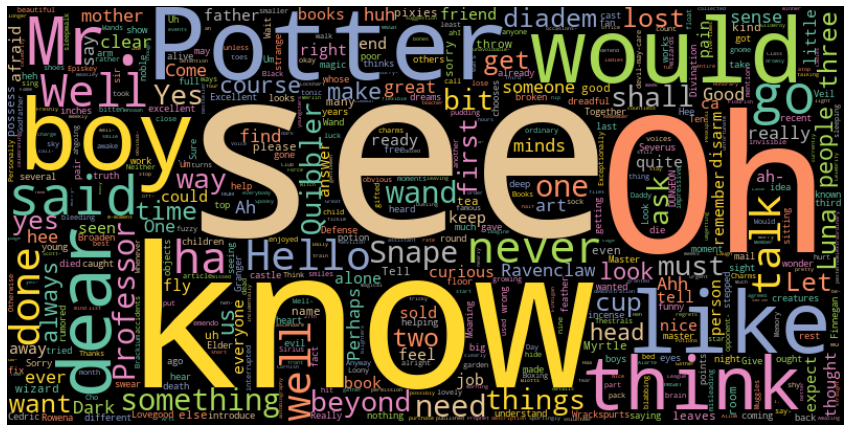

In [ ]:
#확인한 횟수 워드클라우드 모형으로 나타내기
words_cloud = WordCloud(background_color='black', width=800, height=400, colormap='Set2',
                        max_words=2000).generate_from_frequencies(words_frequencies4)
        
plt.figure(figsize=[15,15])
plt.imshow(words_cloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [ ]:
freq_tbl(chadia["Character Name"]).head(10)

,Character Name,frequency,percentage,cumulative_perc
0,Harry Potter,1920,0.258273,0.258273
1,Ron Weasley,862,0.115954,0.374227
2,Hermione Granger,848,0.114070,0.488297
3,Albus Dumbledore,474,0.063761,0.552058
4,Rubeus Hagrid,226,0.030401,0.582459
5,Severus Snape,168,0.022599,0.605058
6,Minerva McGonagall,130,0.017487,0.622545
7,Horace Slughorn,128,0.017218,0.639763
8,Voldemort,118,0.015873,0.655636
9,Neville Longbottom,111,0.014931,0.670568


In [ ]:
freq_tbl(chadia["House"]).head()

,House,frequency,percentage,cumulative_perc
0,Gryffindor,5362,0.721281,0.822393
1,Slytherin,860,0.115685,0.954294
2,Ravenclaw,222,0.029863,0.988344
3,Hufflepuff,56,0.007533,0.996933
4,Beauxbatons Academy of Magic,15,0.002018,0.999233


In [ ]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 7.5 MB/s 


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
nltk.download('vader_lexicon')

sen = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
res1 = {}
for i, row in tqdm(house_Gry.iterrows(), total=len(house_Gry)):
    text = row['Dialogue']
    myid = row['Dialogue']
    res1[myid] = sen.polarity_scores(text)

  0%|          | 0/5362 [00:00<?, ?it/s]

In [ ]:
vaders1 = pd.DataFrame(res1).T
vaders1 = vaders1.reset_index().rename(columns={'index': 'Dialogue'})
vaders1 = vaders1.merge(house_Gry, how='right')
vaders1.head(20)

,Dialogue,neg,neu,pos,compound,Character ID,Character Name,Species,Gender,House,Dialogue ID,Chapter ID,Place ID
0,Come on.,0.000,1.000,0.000,0.0000,1,Harry Potter,Human,Male,Gryffindor,1482,54,46
1,You wait here and try and shift some of this r...,0.000,1.000,0.000,0.0000,1,Harry Potter,Human,Male,Gryffindor,1752,64,25
2,Hesha- Hassah.,0.000,1.000,0.000,0.0000,1,Harry Potter,Human,Male,Gryffindor,1754,64,25
3,"Ginny Ginny! Oh, Ginny, please don't be dead. ...",0.000,0.574,0.426,0.8367,1,Harry Potter,Human,Male,Gryffindor,1755,65,25
4,"Tom. Tom Riddle! What do you mean, 'she won't ...",0.000,1.000,0.000,0.0000,1,Harry Potter,Human,Male,Gryffindor,1757,65,25
5,Are you a ghost?,0.535,0.465,0.000,-0.3182,1,Harry Potter,Human,Male,Gryffindor,1759,65,25
6,I'll tell you later. Let's find Hermione.,0.000,1.000,0.000,0.0000,1,Harry Potter,Human,Male,Gryffindor,6181,194,70
7,It's here...,0.000,1.000,0.000,0.0000,1,Harry Potter,Human,Male,Gryffindor,6185,194,70
8,"She's cold as ice. Ginny, please don't be dead...",0.000,0.647,0.353,0.8287,1,Harry Potter,Human,Male,Gryffindor,1761,65,25
9,"Give me my wand, Tom.",0.000,1.000,0.000,0.0000,1,Harry Potter,Human,Male,Gryffindor,1763,65,25


In [ ]:
vaders1.tail(10)

,Dialogue,neg,neu,pos,compound,Character ID,Character Name,Species,Gender,House,Dialogue ID,Chapter ID,Place ID
5352,Harry. Take my waist.,0.000,1.000,0.000,0.0000,78,Parvati Patil,Human,Female,Gryffindor,3215,119,36
5353,Now.,0.000,1.000,0.000,0.0000,78,Parvati Patil,Human,Female,Gryffindor,3217,119,36
5354,"I know you're going to ask, Harry. But I don't...",0.000,0.826,0.174,0.6124,94,Katie Bell,Human,Female,Gryffindor,5420,176,36
5355,But then why don't people drink it all the time?,0.000,1.000,0.000,0.0000,94,Katie Bell,Human,Female,Gryffindor,4919,164,49
5356,"Sir, you haven't told us what's in that one.",0.000,1.000,0.000,0.0000,94,Katie Bell,Human,Female,Gryffindor,4914,164,49
5357,"Give me a moment, girls.",0.000,1.000,0.000,0.0000,94,Katie Bell,Human,Female,Gryffindor,5419,176,36
5358,"Hi, Harry! I'm Colin Creevy! I'm in Gryffindo...",0.000,1.000,0.000,0.0000,106,Colin Creevey,Human,Male,Gryffindor,1160,44,36
5359,"Wow! Can you turn him around, Harry?",0.000,0.595,0.405,0.6239,106,Colin Creevey,Human,Male,Gryffindor,1204,46,45
5360,Parcel for you Mr Weasley.,0.000,1.000,0.000,0.0000,111,Nigel Wolpert,Human,Male,Gryffindor,3123,116,36
5361,"River, DA calling. Do you read? We have a new ...",0.105,0.895,0.000,-0.2500,111,Nigel Wolpert,Human,Male,Gryffindor,6999,217,55


In [ ]:
#그리핀도르 compound mean = 0.032344 이다
from pandas.core import describe
vaders1.describe()

,neg,neu,pos,compound,Character ID,Dialogue ID,Chapter ID,Place ID
count,5362.000000,5362.000000,5362.000000,5362.000000,5362.000000,5362.000000,5362.000000,5362.000000
mean,0.084755,0.800000,0.115245,0.032344,5.866281,3679.918501,123.990862,39.018090
std,0.187504,0.264361,0.218475,0.343349,10.767152,2146.403000,65.168767,20.239092
min,0.000000,0.000000,0.000000,-0.962800,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.652000,0.000000,0.000000,1.000000,1835.250000,69.000000,23.000000
50%,0.000000,1.000000,0.000000,0.000000,2.000000,3650.500000,134.000000,39.000000
75%,0.058750,1.000000,0.159000,0.202300,4.000000,5561.750000,180.000000,52.000000
max,1.000000,1.000000,1.000000,0.988900,111.000000,7443.000000,234.000000,74.000000


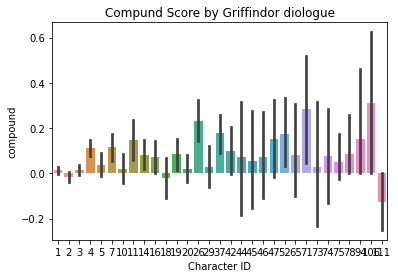

In [ ]:
ax1 = sns.barplot(data=vaders1, x='Character ID', y='compound')
ax1.set_title('Compund Score by Griffindor diologue')
plt.show()

In [ ]:
res2 = {}
for i, row in tqdm(house_Sly.iterrows(), total=len(house_Sly)):
    text = row['Dialogue']
    myid = row['Dialogue']
    res2[myid] = sen.polarity_scores(text)

  0%|          | 0/860 [00:00<?, ?it/s]

In [ ]:
vaders2 = pd.DataFrame(res2).T
vaders2 = vaders2.reset_index().rename(columns={'index': 'Dialogue'})
vaders2 = vaders2.merge(house_Sly, how='right')

In [ ]:
vaders2.head(20)

,Dialogue,neg,neu,pos,compound,Character ID,Character Name,Species,Gender,House,Dialogue ID,Chapter ID,Place ID
0,You've just bought yourself a month's detentio...,0.294,0.706,0.000,-0.3612,6,Severus Snape,Human,Male,Slytherin,5210,171,49
1,Please.,0.000,0.000,1.000,0.3182,6,Severus Snape,Human,Male,Slytherin,7211,225,24
2,Expelliarmus! Vengeance is sweet. How I hoped ...,0.000,0.651,0.349,0.7088,6,Severus Snape,Human,Male,Slytherin,2512,94,20
3,Take them!,0.000,1.000,0.000,0.0000,6,Severus Snape,Human,Male,Slytherin,7210,225,24
4,I told Dumbledore you were helping an old frie...,0.000,0.722,0.278,0.6597,6,Severus Snape,Human,Male,Slytherin,2514,94,20
5,Give me a reason. I beg you!,0.000,1.000,0.000,0.0000,6,Severus Snape,Human,Male,Slytherin,2516,94,20
6,"Oh listen to you two, quarreling like an old m...",0.000,0.800,0.200,0.3612,6,Severus Snape,Human,Male,Slytherin,2521,94,20
7,"I could do it, you know. But why deny the deme...",0.139,0.608,0.253,0.8599,6,Severus Snape,Human,Male,Slytherin,2523,94,20
8,After you.,0.000,1.000,0.000,0.0000,6,Severus Snape,Human,Male,Slytherin,2525,94,20
9,Take them...,0.000,1.000,0.000,0.0000,6,Severus Snape,Human,Male,Slytherin,7209,225,24


In [ ]:
vaders2.tail(10)

,Dialogue,neg,neu,pos,compound,Character ID,Character Name,Species,Gender,House,Dialogue ID,Chapter ID,Place ID
850,What's that supposed to mean?,0.000,1.000,0.000,0.0000,91,Pansy Parkinson,Human,Female,Slytherin,4841,162,42
851,Ummmum.,0.000,1.000,0.000,0.0000,99,Gregory Goyle,Human,Male,Slytherin,1463,54,46
852,"C'mon, Draco. Don't be a prat.",0.000,1.000,0.000,0.0000,99,Gregory Goyle,Human,Male,Slytherin,7159,223,55
853,Avada Kedavra!,0.000,1.000,0.000,0.0000,99,Gregory Goyle,Human,Male,Slytherin,7160,223,55
854,Don't know.,0.000,1.000,0.000,0.0000,105,Blaise Zabini,Human,Male,Slytherin,4838,162,42
855,"Have you ever taken it, sir?",0.000,1.000,0.000,0.0000,105,Blaise Zabini,Human,Male,Slytherin,4921,164,49
856,"Blood traitor, abomination, shame of my flesh!",0.361,0.639,0.000,-0.5255,115,Walburga Black,Human,Female,Slytherin,3591,133,7
857,"Filth! Scum! Half-breeds, mutants, freaks, beg...",0.131,0.869,0.000,-0.3753,115,Walburga Black,Human,Female,Slytherin,3589,133,7
858,Whoo-hoo-hoo!,0.000,1.000,0.000,0.0000,117,Bloody Baron,Ghost,Male,Slytherin,276,13,36
859,"Put a smile on, Miss Reynolds. Wouldn't want m...",0.204,0.676,0.121,0.0716,120,Alecto Carrow,Human,Female,Slytherin,7021,217,55


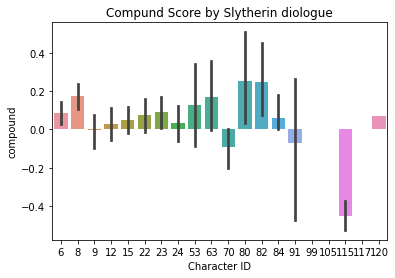

In [ ]:
ax2 = sns.barplot(data=vaders2, x='Character ID', y='compound')
ax2.set_title('Compund Score by Slytherin diologue')
plt.show()

In [ ]:
#슬리데린의 compound mean = 0.071718
vaders2.describe()

,neg,neu,pos,compound,Character ID,Dialogue ID,Chapter ID,Place ID
count,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000
mean,0.081634,0.793272,0.125106,0.071718,17.374419,4482.396512,148.920930,40.043023
std,0.163574,0.229982,0.191704,0.390875,18.483905,1913.565696,56.655779,17.987041
min,0.000000,0.000000,0.000000,-0.933100,6.000000,238.000000,11.000000,1.000000
25%,0.000000,0.664000,0.000000,0.000000,8.000000,3418.750000,127.000000,25.000000
50%,0.000000,0.842000,0.000000,0.000000,12.000000,4681.500000,158.000000,41.000000
75%,0.116500,1.000000,0.197250,0.362775,22.000000,5674.250000,181.250000,49.000000
max,1.000000,1.000000,1.000000,0.929200,120.000000,7444.000000,234.000000,74.000000


In [ ]:
res3 = {}
for i, row in tqdm(house_Huf.iterrows(), total=len(house_Huf)):
    text = row['Dialogue']
    myid = row['Dialogue']
    res3[myid] = sen.polarity_scores(text)

  0%|          | 0/56 [00:00<?, ?it/s]

In [ ]:
vaders3 = pd.DataFrame(res3).T
vaders3 = vaders3.reset_index().rename(columns={'index': 'Dialogue'})
vaders3 = vaders3.merge(house_Huf, how='right')

In [ ]:
vaders3.head(20)

,Dialogue,neg,neu,pos,compound,Character ID,Character Name,Species,Gender,House,Dialogue ID,Chapter ID,Place ID
0,What is it?,0.000,1.000,0.000,0.0000,36,Cedric Diggory,Human,Male,Hufflepuff,3403,126,14
1,"Are you serious? And Fleur and Krum, do they...?",0.172,0.828,0.000,-0.1680,36,Cedric Diggory,Human,Male,Hufflepuff,3050,115,45
2,Hey Potter.,0.000,1.000,0.000,0.0000,36,Cedric Diggory,Human,Male,Hufflepuff,3246,120,29
3,Yes sir.,0.000,0.270,0.730,0.4019,36,Cedric Diggory,Human,Male,Hufflepuff,2773,105,17
4,What are you talking about?,0.000,1.000,0.000,0.0000,36,Cedric Diggory,Human,Male,Hufflepuff,3402,126,14
5,It's a portkey. Harry the cup is a portkey.,0.000,1.000,0.000,0.0000,36,Cedric Diggory,Human,Male,Hufflepuff,3400,126,14
6,Where are we?,0.000,1.000,0.000,0.0000,36,Cedric Diggory,Human,Male,Hufflepuff,3398,126,14
7,You know for a moment there I thought you were...,0.000,1.000,0.000,0.0000,36,Cedric Diggory,Human,Male,Hufflepuff,3390,125,62
8,Alright.,0.000,0.000,1.000,0.2500,36,Cedric Diggory,Human,Male,Hufflepuff,3048,115,45
9,Who are you? What do you want?,0.000,0.783,0.217,0.1680,36,Cedric Diggory,Human,Male,Hufflepuff,3405,126,14


In [ ]:
vaders3.tail(10)

,Dialogue,neg,neu,pos,compound,Character ID,Character Name,Species,Gender,House,Dialogue ID,Chapter ID,Place ID
46,"Yes, well, just leave him there. Right! On we ...",0.045,0.744,0.211,0.6679,79,Pomona Sprout,Human,Female,Hufflepuff,1154,44,38
47,"Uh, Longbottom's been neglecting his earmuffs.",0.351,0.649,0.000,-0.4019,79,Pomona Sprout,Human,Female,Hufflepuff,1152,44,38
48,It's like I said. She went to the loo and whe...,0.000,0.842,0.158,0.5106,100,Leanne,Human,Female,Hufflepuff,5078,167,61
49,I warned her! I warned her not to touch it!,0.444,0.556,0.000,-0.5837,100,Leanne,Human,Female,Hufflepuff,5070,167,22
50,Katie. You don't know what it could be!,0.000,1.000,0.000,0.0000,100,Leanne,Human,Female,Hufflepuff,5068,167,22
51,You mean Dumbledore believes him.,0.000,1.000,0.000,0.0000,109,Justin Finch-Fletchley,Human,Male,Hufflepuff,3907,143,21
52,What are you playing at?,0.000,0.690,0.310,0.2023,109,Justin Finch-Fletchley,Human,Male,Hufflepuff,1407,52,36
53,How do we know You-Know-Who's really back?,0.000,1.000,0.000,0.0000,116,Zacharias Smith,Human,Male,Hufflepuff,3905,143,21
54,Oh please. Professor Lockhart taught us that i...,0.000,0.796,0.204,0.3182,116,Zacharias Smith,Human,Male,Hufflepuff,4031,145,55
55,"I don't know...if it were found...I mean, Umbr...",0.161,0.839,0.000,-0.2755,118,Ernest Macmillan,Human,Male,Hufflepuff,3930,143,21


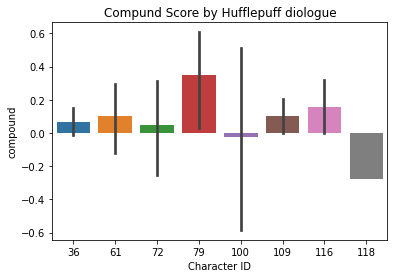

In [ ]:
ax3 = sns.barplot(data=vaders3, x='Character ID', y='compound')
ax3.set_title('Compund Score by Hufflepuff diologue')
plt.show()

In [ ]:
#후플푸프 compound mean = 0.100425
vaders3.describe()

,neg,neu,pos,compound,Character ID,Dialogue ID,Chapter ID,Place ID
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,0.049286,0.815750,0.134964,0.100425,61.785714,3649.375000,129.375000,35.375000
std,0.108531,0.229788,0.217881,0.331416,25.377667,1338.366597,40.386119,22.630279
min,0.000000,0.000000,0.000000,-0.743000,36.000000,1144.000000,44.000000,7.000000
25%,0.000000,0.716250,0.000000,0.000000,36.000000,3251.500000,120.000000,14.000000
50%,0.000000,0.860500,0.000000,0.000000,61.000000,3420.000000,127.000000,29.000000
75%,0.000000,1.000000,0.212500,0.361200,79.000000,3919.500000,143.000000,62.000000
max,0.444000,1.000000,1.000000,0.795800,118.000000,7084.000000,221.000000,70.000000


In [ ]:
res4 = {}
for i, row in tqdm(house_Rav.iterrows(), total=len(house_Rav)):
    text = row['Dialogue']
    myid = row['Dialogue']
    res4[myid] = sen.polarity_scores(text)

  0%|          | 0/222 [00:00<?, ?it/s]

In [ ]:
vaders4 = pd.DataFrame(res4).T
vaders4 = vaders4.reset_index().rename(columns={'index': 'Dialogue'})
vaders4 = vaders4.merge(house_Rav, how='right')

In [ ]:
vaders4.head(20)

,Dialogue,neg,neu,pos,compound,Character ID,Character Name,Species,Gender,House,Dialogue ID,Chapter ID,Place ID
0,"Whenever you're ready, sir.",0.000,0.545,0.455,0.3612,25,Luna Lovegood,Human,Female,Ravenclaw,6708,207,13
1,"You're bleeding, Harry. That's a curious thing...",0.000,0.813,0.187,0.3182,25,Luna Lovegood,Human,Female,Ravenclaw,6696,206,13
2,Ron? Harry?,0.000,1.000,0.000,0.0000,25,Luna Lovegood,Human,Female,Ravenclaw,6687,206,13
3,Quibbler...? Quibbler...?,0.000,1.000,0.000,0.0000,25,Luna Lovegood,Human,Female,Ravenclaw,4821,161,42
4,There's an article on Wrackspurts this month. ...,0.000,1.000,0.000,0.0000,25,Luna Lovegood,Human,Female,Ravenclaw,4822,161,42
5,He's lovely. They've been known to sing on Bo...,0.000,0.759,0.241,0.5859,25,Luna Lovegood,Human,Female,Ravenclaw,4823,161,42
6,They're invisible creatures that float in thro...,0.000,1.000,0.000,0.0000,25,Luna Lovegood,Human,Female,Ravenclaw,4825,161,42
7,"Of course. Anyway, my mum always said the thin...",0.072,0.928,0.000,-0.4019,25,Luna Lovegood,Human,Female,Ravenclaw,4645,156,36
8,"Hello, everyone. You look dreadful, Ron.",0.367,0.633,0.000,-0.4404,25,Luna Lovegood,Human,Female,Ravenclaw,5157,169,36
9,Who are those people?,0.000,1.000,0.000,0.0000,25,Luna Lovegood,Human,Female,Ravenclaw,4860,162,42


In [ ]:
vaders4.tail(10)

,Dialogue,neg,neu,pos,compound,Character ID,Character Name,Species,Gender,House,Dialogue ID,Chapter ID,Place ID
212,"Oh, well done! See here, everyone! Ms. Granger...",0.0,0.586,0.414,0.7946,59,Filius Flitwick,Human (Part-Goblin),Male,Ravenclaw,427,17,26
213,"Well done, dear.",0.0,0.175,0.825,0.5719,59,Filius Flitwick,Human (Part-Goblin),Male,Ravenclaw,429,17,26
214,Whooaaa! Ooh.,0.0,1.000,0.000,0.0000,59,Filius Flitwick,Human (Part-Goblin),Male,Ravenclaw,430,17,26
215,"The third floor's clear too, sir.",0.0,0.658,0.342,0.3818,59,Filius Flitwick,Human (Part-Goblin),Male,Ravenclaw,2183,82,36
216,"You realize, of course, that nothing we do wil...",0.0,1.000,0.000,0.0000,59,Filius Flitwick,Human (Part-Goblin),Male,Ravenclaw,7046,219,66
217,Hi Harry.,0.0,1.000,0.000,0.0000,101,Padma Patil,Human,Female,Ravenclaw,3189,118,39
218,Are you going to ask me to dance or not?,0.0,1.000,0.000,0.0000,101,Padma Patil,Human,Female,Ravenclaw,3224,119,36
219,Is that Hermione Granger? With Viktor Krum??,0.0,1.000,0.000,0.0000,101,Padma Patil,Human,Female,Ravenclaw,3213,119,36
220,I for one would like to know why Potter's qual...,0.0,0.848,0.152,0.3612,119,Michael Corner,Human,Male,Ravenclaw,3915,143,21
221,Dunno. He and me dad don't get on. Probably b...,0.0,0.939,0.061,0.2263,124,Marcus Belby,Human,Male,Ravenclaw,5115,168,49


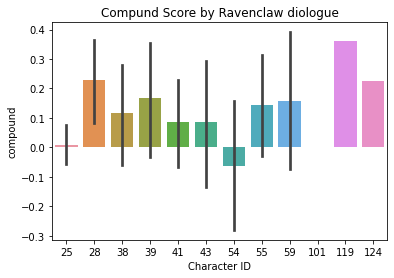

In [ ]:
ax4 = sns.barplot(data=vaders4, x='Character ID', y='compound')
ax4.set_title('Compund Score by Ravenclaw diologue')
plt.show()

In [ ]:
#레번클로 compound mean = 0.105504
vaders4.describe()

,neg,neu,pos,compound,Character ID,Dialogue ID,Chapter ID,Place ID
count,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000
mean,0.082189,0.774590,0.143225,0.105504,37.572072,3593.896396,120.234234,36.918919
std,0.152846,0.236314,0.209943,0.390448,15.496073,2305.261614,69.929241,14.808360
min,0.000000,0.000000,0.000000,-0.932400,25.000000,133.000000,5.000000,1.000000
25%,0.000000,0.635250,0.000000,0.000000,25.000000,1514.500000,55.000000,28.500000
50%,0.000000,0.806500,0.000000,0.000000,38.000000,3259.000000,120.000000,36.000000
75%,0.125750,1.000000,0.222750,0.393275,43.000000,5182.750000,170.500000,47.000000
max,1.000000,1.000000,1.000000,0.964400,124.000000,7418.000000,233.000000,70.000000


In [ ]:
rav_dialogues = pd.DataFrame(rav_dialogues_list)
rav_dialogues.columns = ['words']
rav_dialogues.head(10)

,words
0,Whenever
1,ready
2,sir
3,bleeding
4,curious
5,thing
6,keep
7,sock
8,Quibbler
9,Quibbler


In [ ]:
res5 = {}
for i, row in tqdm(rav_dialogues.iterrows(), total=len(rav_dialogues)):
    text = row['words']
    myid = row['words']
    res5[myid] = sen.polarity_scores(text)

  0%|          | 0/1562 [00:00<?, ?it/s]

In [ ]:
vaders5 = pd.DataFrame(res5).T

In [ ]:
vaders5.head(10)

,neg,neu,pos,compound
Whenever,0.0,1.0,0.0,0.0000
ready,0.0,0.0,1.0,0.3612
sir,0.0,1.0,0.0,0.0000
bleeding,0.0,1.0,0.0,0.0000
curious,0.0,0.0,1.0,0.3182
thing,0.0,1.0,0.0,0.0000
keep,0.0,1.0,0.0,0.0000
sock,0.0,1.0,0.0,0.0000
Quibbler,0.0,1.0,0.0,0.0000
article,0.0,1.0,0.0,0.0000


In [ ]:
#레번클로 사용 단어 compound mean = 0.012864
vaders5.describe()

,neg,neu,pos,compound
count,945.000000,945.000000,945.000000,945.000000
mean,0.084656,0.795767,0.119577,0.012864
std,0.278517,0.403353,0.324638,0.188600
min,0.000000,0.000000,0.000000,-0.690800
25%,0.000000,1.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.636900


In [ ]:
gry_dialogues = pd.DataFrame(gry_dialogues_list)
gry_dialogues.columns = ['words']
gry_dialogues.head(10)

,words
0,Come
1,wait
2,try
3,shift
4,rock
5,get
6,back
7,go
8,find
9,Ginny


In [ ]:
res6 = {}
for i, row in tqdm(gry_dialogues.iterrows(), total=len(gry_dialogues)):
    text = row['words']
    myid = row['words']
    res6[myid] = sen.polarity_scores(text)

  0%|          | 0/23297 [00:00<?, ?it/s]

In [ ]:
vaders6 = pd.DataFrame(res6).T

In [ ]:
vaders6.head(10)

,neg,neu,pos,compound
Come,0.0,1.0,0.0,0.0
wait,0.0,1.0,0.0,0.0
try,0.0,1.0,0.0,0.0
shift,0.0,1.0,0.0,0.0
rock,0.0,1.0,0.0,0.0
get,0.0,1.0,0.0,0.0
back,0.0,1.0,0.0,0.0
go,0.0,1.0,0.0,0.0
find,0.0,1.0,0.0,0.0
Ginny,0.0,1.0,0.0,0.0


In [ ]:
#그리핀도르 사용 단어 compound mean = 0.000831
vaders6.describe()

,neg,neu,pos,compound
count,4965.000000,4965.000000,4965.000000,4965.000000
mean,0.094260,0.808258,0.097482,0.000831
std,0.292219,0.393711,0.296643,0.185709
min,0.000000,0.000000,0.000000,-0.690800
25%,0.000000,1.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.648600


In [ ]:
sly_dialogues = pd.DataFrame(sly_dialogues_list)
sly_dialogues.columns = ['words']
sly_dialogues.head(10)

,words
0,bought
1,month
2,detention
3,McLaggen
4,Please
5,Expelliarmus
6,Vengeance
7,sweet
8,hoped
9,one


In [ ]:
res7 = {}
for i, row in tqdm(sly_dialogues.iterrows(), total=len(sly_dialogues)):
    text = row['words']
    myid = row['words']
    res7[myid] = sen.polarity_scores(text)

  0%|          | 0/5372 [00:00<?, ?it/s]

In [ ]:
vaders7 = pd.DataFrame(res7).T

vaders7.head(10)

,neg,neu,pos,compound
bought,0.0,1.0,0.0,0.0000
month,0.0,1.0,0.0,0.0000
detention,1.0,0.0,0.0,-0.3612
McLaggen,0.0,1.0,0.0,0.0000
Please,0.0,0.0,1.0,0.3182
Expelliarmus,0.0,1.0,0.0,0.0000
Vengeance,0.0,1.0,0.0,0.0000
sweet,0.0,0.0,1.0,0.4588
hoped,0.0,0.0,1.0,0.3818
one,0.0,1.0,0.0,0.0000


In [ ]:
#슬리데린 사용 단어 compound mean = 0.005917
vaders7.describe()

,neg,neu,pos,compound
count,2201.000000,2201.000000,2201.000000,2201.000000
mean,0.094957,0.791913,0.113130,0.005917
std,0.293222,0.406032,0.316824,0.192295
min,0.000000,0.000000,0.000000,-0.690800
25%,0.000000,1.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.636900


In [ ]:
huf_dialogues = pd.DataFrame(huf_dialogues_list)
huf_dialogues.columns = ['words']
huf_dialogues.head(10)

,words
0,serious
1,Fleur
2,Krum
3,Hey
4,Potter
5,Yes
6,sir
7,talking
8,portkey
9,cup


In [ ]:
res8 = {}
for i, row in tqdm(huf_dialogues.iterrows(), total=len(huf_dialogues)):
    text = row['words']
    myid = row['words']
    res8[myid] = sen.polarity_scores(text)

  0%|          | 0/266 [00:00<?, ?it/s]

In [ ]:
vaders8 = pd.DataFrame(res8).T

vaders8.head(10)

,neg,neu,pos,compound
serious,1.0,0.0,0.0,-0.0772
Fleur,0.0,1.0,0.0,0.0000
Krum,0.0,1.0,0.0,0.0000
Hey,0.0,1.0,0.0,0.0000
Potter,0.0,1.0,0.0,0.0000
Yes,0.0,0.0,1.0,0.4019
sir,0.0,1.0,0.0,0.0000
talking,0.0,1.0,0.0,0.0000
portkey,0.0,1.0,0.0,0.0000
cup,0.0,1.0,0.0,0.0000


In [ ]:
#후플푸프 사용 단어 compound mean = 0.016901
vaders8.describe()

,neg,neu,pos,compound
count,217.000000,217.000000,217.000000,217.000000
mean,0.059908,0.834101,0.105991,0.016901
std,0.237865,0.372850,0.308538,0.171723
min,0.000000,0.000000,0.000000,-0.690800
25%,0.000000,1.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.648600


In [ ]:
mean_Result = pd.DataFrame({'Mean':['Dialogue', 'Words'], 'Gryffindor':['0.032344','0.000831'], 'Slytherin':['0.071718','0.005917'], 'Hufflepuff':['0.100425','0.016901'], 'Ravanclaw':['0.105504','0.012864']})

In [ ]:
mean_Result

,Mean,Gryffindor,Slytherin,Hufflepuff,Ravanclaw
0,Dialogue,0.032344,0.071718,0.100425,0.105504
1,Words,0.000831,0.005917,0.016901,0.012864
